# 实验题目2：美国总统大选数据分析

实验内容：现有一份美国大选捐款的统计数据，根据给出的数据，分析数据并实现以下要求：

1、统计各个州的捐款总额，并在美国地图上画出各州捐款总额的热度图（heatmap），颜色越深的州代表捐款额越多，要求图表美观易懂。

2、统计获得捐赠额最多的三位候选人的捐赠额变化趋势，使用折线图展示，横轴表示时间，纵轴表示捐赠额，要求图表美观易懂。

3、分析出获得捐款额最多的候选人，然后将此候选人的捐赠者的姓名画成词云图。

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px  # Be sure to import express
import kaleido
import plotly.io as pio
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from wordcloud import WordCloud,ImageColorGenerator

In [2]:
originData = pd.read_csv(
    "data/itcont_2020_20200722_20200820.txt", sep='|')
stateAmt =  originData[['STATE', 'TRANSACTION_AMT']]
doantionPerState = stateAmt.groupby('STATE')['TRANSACTION_AMT'].sum()


C:\Users\Delta\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (10,15,16,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
d = pd.DataFrame({'state' : doantionPerState.index,'value' : doantionPerState})
fullName = pd.read_json('./state.json',orient='index')
fullName = pd.DataFrame({'state' : fullName.index,'full':fullName[0]})
d = d.merge(fullName,how='left')

## 1、统计各个州的捐款总额，并在美国地图上画出各州捐款总额的热度图（heatmap），颜色越深的州代表捐款额越多，要求图表美观易懂。

In [4]:

fig = px.choropleth(d,  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color="value",  # DataFrame column with color values
                    hover_name="full", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = '美国各州捐款总额', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen



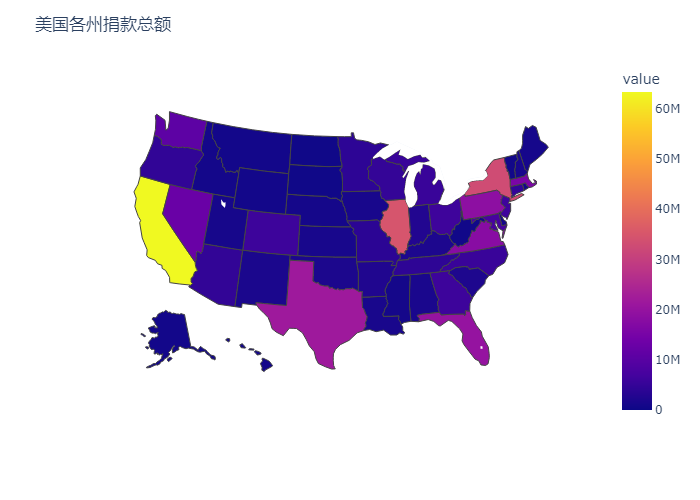

In [5]:
display(Image(fig.to_image()))

------------------------

In [6]:
data = originData[['CMTE_ID','TRANSACTION_AMT','TRANSACTION_DT','NAME']] # MMDDYYYY
cclData = pd.read_csv("data/ccl.txt",sep='|')[['CAND_ID','CMTE_ID']]
td = data.merge(cclData)
dname = pd.read_csv("data/weball20.txt",sep='|')[['CAND_ID','CAND_NAME']]
td = td.merge(dname)
td['TRANSACTION_DT'] = pd.to_datetime(td['TRANSACTION_DT'],format='%m%d%Y')
std = td.groupby('CAND_NAME')['TRANSACTION_AMT'].sum().sort_values(ascending=False)


## 2、统计获得捐赠额最多的三位候选人的捐赠额变化趋势，使用折线图展示，横轴表示时间，纵轴表示捐赠额，要求图表美观易懂。

Text(34.25, 0.5, '获得捐赠数额（美元）')

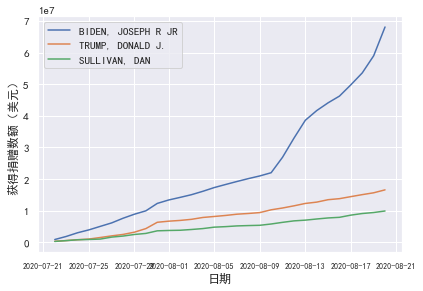

In [7]:

sns.set()
%matplotlib inline

for member in (std.index[:3]):
   # print(member)
    tmp = td[td['CAND_NAME'] == member]
    moneyPerDay = tmp.groupby('TRANSACTION_DT')['TRANSACTION_AMT'].sum()
    money = np.cumsum(moneyPerDay)
    money.index.name = 'Date'

    # display(money.index)
    plt.plot(money,label=member)
    
plt.tight_layout()
plt.legend()
# fig = plt.figure(figsize=(40,4))
plt.tick_params(axis='x', labelsize=8) 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.xlabel(u'日期')
plt.ylabel(u"获得捐赠数额（美元）")

## 3、分析出获得捐款额最多的候选人，然后将此候选人的捐赠者的姓名画成词云图。

(507816,)


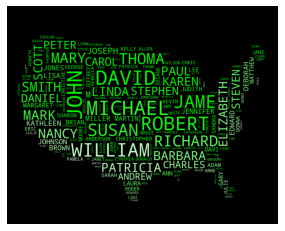

In [8]:
biden = td[td['CAND_NAME'] == 'BIDEN, JOSEPH R JR']['NAME']
print(biden.shape)
data = ','.join(biden.to_list())
# 读取图片文件
bg = plt.imread("data/us.jpg")
# 生成
wc = WordCloud(  # FFFAE3
    background_color="black",  # 设置背景为白色，默认为黑色
    width=1920,  # 设置图片的宽度
    height=1080,  # 设置图片的高度
    mask=bg,    # 画布
    margin=10,  # 设置图片的边缘
    max_font_size=100,  # 显示的最大的字体大小
    random_state=20,  # 为每个单词返回一个PIL颜色
).generate_from_text(data)
# 图片背景
bg_color = ImageColorGenerator(bg)
# 开始画图
plt.imshow(wc.recolor(color_func=bg_color))
# 为云图去掉坐标轴
plt.axis("off")
# 画云图，显示
# 保存云图
wc.to_file("biden.png")